## New Orleans Active Business License Analysis (2000-2026)
This notebook explores active business licenses in New Orleans using publicly available city data.  

The analysis focuses on business start trends, common business types, and geographic patterns across the city.

In [1]:
import pandas as pd

df = pd.read_csv("active_occ_licenses_2025.csv")

print(df.shape)
print(df.columns.tolist())
df.head()

(10896, 20)
['BusinessAddress', 'BusinessName', 'BusinessPhone', 'BusinessStartDate', 'BusinessType', 'BusinessLicenseNumber', 'City', 'OwnerName', 'State', 'StreetDirection', 'StreetName', 'StreetNumber', 'StreetSuffix', 'Suite', 'Zip', 'LocationX', 'LocationY', 'Latitude', 'Longitude', 'Location']


,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
0,4532 MAGAZINE ST,OCTAVIA ART AND FILM,504-616-6202,2008-03-14,Art Dealers,102680731,NEW ORLEANS,PAMELA M BRYAN,LA,NaN,MAGAZINE,4532,ST,NaN,70115-1543,3670385.57,518674.04,29.920506,-90.103601,POINT (-90.10360111114565 29.92050622841199)
1,24740 MILL VALLEY WAY,ALLOHN DESIGNS,NaN,2018-05-14,Special Events-Other (Vendor),105032410,CARSON,AGBENYA ALLOHN,CA,NaN,MILL VALLEY,24740,WAY,NaN,90745-6454,0.00,0.00,0.000000,0.000000,POINT (0 0)
2,2555 VALENCE ST,LOUANGER,(503) 867-6923,2025-02-01,Bed & Breakfast Inns,106124978,NEW ORLEANS,LOUANGER,LA,NaN,VALENCE,2555,ST,NaN,70115-6341,3669444.11,524212.50,29.935763,-90.106386,POINT (-90.10638567129016 29.935762975538836)
3,650 S ROCHEBLAVE ST,NOLA FROZEN TIME PHOTOGRAPHY,(504) 892-3220,2025-03-27,"Photography Studios, Portrait",106022854,NEW ORLEANS,NOLA FROZEN TIME PHOTOGRAPHY L,LA,S,ROCHEBLAVE,650,ST,NaN,70119-7439,3674709.28,532565.42,29.958575,-90.089477,POINT (-90.0894771646702 29.958574674015836)
4,3317 MAGAZINE ST,A VARGAS BODY SHOP,504-891-2606,1980-02-03,"Automotive Body, Paint & Interior Repair & Mai...",101117693,NEW ORLEANS,A VARGAS BODY SHOP INC,LA,NaN,MAGAZINE,3317,ST,NaN,70115-2410,3675193.08,519773.31,29.923386,-90.088388,POINT (-90.08838832801506 29.923386122945704)


## Inspecting the Dataset Structure and Quality
This step checks the overall structure and quality of the dataset.
It shows:
1. How many rows and columns are present?
2. Which columns contain missing values?
3. Basic summary statistics for the data.
4. Whether any duplicate records exist. 

This quick review helps confirm that the data loaded correctly and highlights any issues that may need cleaning before analysis.

In [2]:
df.info()
df.isnull().sum()
df.describe(include='all')
df.duplicated().sum()
df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10896 entries, 0 to 10895
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BusinessAddress        10896 non-null  object 
 1   BusinessName           8014 non-null   object 
 2   BusinessPhone          9594 non-null   object 
 3   BusinessStartDate      10896 non-null  object 
 4   BusinessType           10894 non-null  object 
 5   BusinessLicenseNumber  10896 non-null  int64  
 6   City                   10896 non-null  object 
 7   OwnerName              10896 non-null  object 
 8   State                  10896 non-null  object 
 9   StreetDirection        1382 non-null   object 
 10  StreetName             10855 non-null  object 
 11  StreetNumber           10858 non-null  object 
 12  StreetSuffix           10768 non-null  object 
 13  Suite                  1429 non-null   object 
 14  Zip                    10896 non-null  object 
 15  Lo

,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
76,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)


## Cleaning and Standardizing Column Names
This step cleans up the column names so they are easier to read, type, and work with throughout the analysis.

First, all column names are:
1. Stripped of extra spaces.
2. Converted to lowercase.
3. Updated to replace spaces with underscores.

This creates consistent, Python-friendly column names that are easier to reference in code and reduce the risk of typing errors.

Next, a few specific column names are renamed for clarity and consistency, such as changing variations like businessname into business_name. This ensures that column names follow a clear and predictable naming pattern.

Finally, the cleaned list of column names is displayed to confirm that the changes were applied correctly.

Overall, this step:
1. Makes the dataset easier to work with.
2. Improves readability and consistency.
3. Helps prevent mistakes in later analysis and visualizations.

This kind of cleanup is a standard best practice before doing deeper data analysis.

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.rename(columns = {"businessname": "business_name", "businessstartdate": "business_start_date"})

df.columns

Index(['businessaddress', 'business_name', 'businessphone',
       'business_start_date', 'businesstype', 'businesslicensenumber', 'city',
       'ownername', 'state', 'streetdirection', 'streetname', 'streetnumber',
       'streetsuffix', 'suite', 'zip', 'locationx', 'locationy', 'latitude',
       'longitude', 'location'],
      dtype='object')

## Cleaning ZIP Code Values from Mapping
This step cleans and standardizes ZIP code values so they can be used reliably in maps and location-based analysis.

First, the ZIP code column is converted to text to ensure consistent formatting. Any extra spaces are removed, and only the first five digits are kept. This removes ZIP+4 extensions and keeps ZIP codes in a standard format.

Next, rows with ZIP codes that are not numeric are removed. This filters out invalid or malformed entries that could cause errors when grouping data or displaying locations on a map.

By cleaning ZIP codes this way, the dataset becomes:
1. Consistent across all records.
2. Compatible with geographic grouping.
2. Reliable for heatmaps and ZIP-level summaries.

This ensures that any location-based visuals accurately reflect real ZIP code areas in New Orleans.

In [4]:
map_data = df.copy()

In [5]:
map_data['zip'] = (
    map_data['zip']
    .astype(str)
    .str.strip()
    .str.slice(0,5)
)
map_data = map_data[map_data['zip'].str.isnumeric()]

## Null & Duplicate Data Checks

This step checks the dataset for missing information and potential duplicate entries in important fields used to identify businesses.

First, any rows missing a business name are removed. A business name is essential for identifying and grouping records, so entries without one cannot be reliably analyzed.

Next, the code counts how many missing values remain in key columns:
1. business_name
2. suite

Missing suite numbers are expected, since many businesses do not have a suite. These values are kept and do not affect the analysis.

Finally, the dataset is checked for possible duplicate records by looking up a specific business name and displaying all rows that match it. This helps confirm whether repeated business names represent true duplicates or legitimate multiple records (such as renewals, relocations, or separate licenses).

Overall, this step ensures the data is clean enough for analysis, while confirming that any remaining missing values or repeated names are understood and intentional rather than errors.

In [6]:
df = df[df['business_name'].notnull()]

df[['business_name', 'suite']].isnull().sum()

duplicate_example = df[df['business_name'] == "NOLAVORE'S A LA CARTE MARKET"]
duplicate_example

,businessaddress,business_name,businessphone,business_start_date,businesstype,businesslicensenumber,city,ownername,state,streetdirection,streetname,streetnumber,streetsuffix,suite,zip,locationx,locationy,latitude,longitude,location
75,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)
76,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)
5488,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2024-01-01,Convenience Stores,105069380,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)


## Sample Values from Each Column
This step displays one example value from each column in the dataset to help understand what kind of information each column contains. 

For every column: 
1. Missing (blank) values are ignored.
2. The first available non-empty value is shown as an example.

This does not summarize all data or calculate totals. It simply provides a quick preview of the type and format of data stored in each column, such as addresses, dates, business types, or geographic coordinates. 

This is helpful for:
1. Verifying the columns were read correctly.
2. Understanding what each field represents before analysis.
3. Spotting formatting issues early, such as phone numbers or ZIP codes.

Overall, this step acts as a quick reference guide to the dataset's structure and contents without changing any data. 

In [7]:
for col in df.columns:
    sample_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No data"
    print(f"- **{col}**: Example value → {sample_value}")

- **businessaddress**: Example value → 4532 MAGAZINE ST
- **business_name**: Example value → OCTAVIA ART AND FILM
- **businessphone**: Example value → 504-616-6202
- **business_start_date**: Example value → 2008-03-14
- **businesstype**: Example value → Art Dealers
- **businesslicensenumber**: Example value → 102680731
- **city**: Example value → NEW ORLEANS
- **ownername**: Example value → PAMELA M BRYAN
- **state**: Example value → LA
- **streetdirection**: Example value → S
- **streetname**: Example value → MAGAZINE
- **streetnumber**: Example value → 4532
- **streetsuffix**: Example value → ST
- **suite**: Example value → 102
- **zip**: Example value → 70115-1543
- **locationx**: Example value → 3670385.57
- **locationy**: Example value → 518674.04
- **latitude**: Example value → 29.92050622841199
- **longitude**: Example value → -90.10360111114564
- **location**: Example value → POINT (-90.10360111114565 29.92050622841199)


## Removing Records Without a Business Name
Some records in the dataset were missing a business name, which is a key piece of information needed to identify and group businesses correctly. 

Because a business name is essential for meaningful analysis, those rows were removed from the dataset. 

Other fields, such as the suite number, were left unchanged even when missing.  Not all businesses operate out of a suite, so blank values in that column are expected and do not affect the analysis. 

This step helps make sure the dataset remains: 
1. Reliable for grouping and counting businesses.
2. Easier to interpret in charts and summaries.
3. Focused on valid, identifiable business records. 

In [8]:
df[df['business_name'].isnull()].head()

,businessaddress,business_name,businessphone,business_start_date,businesstype,businesslicensenumber,city,ownername,state,streetdirection,streetname,streetnumber,streetsuffix,suite,zip,locationx,locationy,latitude,longitude,location


## Converting Business Start Dates to a Date Format
In this step, the business start date column is converted into a proper date format that Python can understand. 

This allows the data to recognize each value as an actual calendar date instead of plain text. 

By doing this, we make it possible to: 
1. Sort businesses by date.
2. Extract parts of the date, such as year or month.
3. Perform time-based analysis, such as trends and comparisons over time.

Any invalid or unreadable date values are safely handled so they don't break later in the analysis. 

In [9]:
df = df.copy()
df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors='coerce')

## Extracting the Start Year and Filtering the Date Range
After converting the start date into a usable format, this step pulls out just the year each business opened and stores it in a new column. 

The data is then filtered to include only businesses that opened between 2000 and 2026, which matches the time range used throughout the analysis. 

This makes the dataset: 
1. Easier to summarize by year.
2. Consistent across charts and visuals.
3. Focused on modern business trends rather than incomplete early records.

From here, the cleaned year data can be used for yearly counts, growth trends, and comparisons. 

In [10]:
df['business_start_year'] = df['business_start_date'].dt.year
df_2000 = df[df['business_start_year'].between(2000, 2026)]

## Understanding the Dataset Columns

This section explains what each column in the dataset represents and shows an example value for reference. By this point in the analysis, basic cleaning and formatting steps have already been applied, so the columns shown here reflect a cleaned and usable version of the data. 

Reviewing the columns at this stage helps confirm: 
1. What information is available for the analysis?
2. How each column is expected to be used.
3. That the data structure makes sense before deeper exploration and visuals.

This overview acts as a reference guide for the rest of the project, which makes it easier to understand where values come from when interpreting charts, trends, and geographic patterns later on. 

### Column Description

- **BusinessAddress**: Full street address of the buisness
  location. _e.g., "4532 MAGAZINE ST"_

---

- **BusinessName**: Registered name of the business.
  _e.g., "OCTAVIA ART AND FILM"_

---

- **BusinessPhone**: Business contact number.
  _e.g., "504-616-6202"_

---

- **BusinessStartDate**: Official start date of business
  operations. _e.g., "2008-03-14"_

---

- **BusinessType**: Classification of the business activity or
  industry. _e.g., "Art Dealers"_

---

- **BusinessLicenseNumber**: Unique license ID assigned by the city. _e.g., "102680731"_

---

- **City**: City where the business is registered.
  _e.g., "NEW ORLEANS"_

---

- **OwnerName**: Full name of the business owner.
  _e.g., "PAMELA M BRYAN"_

---

- **State**: State abbreviation.
  _e.g., "LA"_

---

- **StreetDirection**: Compass direction used in the street address. _e.g., "S"_

---

- **StreetName**: Name of the street without number or direction.
 _e.g., "MAGAZINE"_

---

- **StreetNumber**: Number portion of the address.
  _e.g., "4532"_

---

- **StreetSuffix**: Type of road or street abbreviation.
  _e.g., "ST"_

---

- **Suite**: Internal office or suite number, if applicable.
  _e.g., "207"_

---

- **Zip**: ZIP code including any extended digits.
  _e.g., "70115-1543"_

---

- **LocationX / LocationY**: Internal coordinate reference system
  values.

---

- **Lattitude / Longitude**: Georgraphic location of the business.
  _e.g., (29.0205, -99.1036)

---

- **Location**: GIS-style point reference for mapping.
  _e.g., "POINT (-90.1036 29.9205)"_

## Number of Businesses Starting Over the Years (2000-2026)
This section shows how many new businesses opened each year in New Orleans between 2000 and 2026. 

The data is first filtered so that only business start dates within this time range are included. After filtering, each business is grouped by its start year and counted. 

This makes it possible to see how business activity changes over the years, rather than focusing on individual businesses.

The chart created from this data helps answer questions such as:
1. Have more businesses opened in any specific years?
2. Were there noticeable slowdowns or dips in business openings?
3. How did business growth change over time?

Overall, this view provides a high-level timeline of business formation in the city and sets the foundation for more detailed analyses, such as year-over-year trends or seasonal quarter-based patterns explored later in the project. 

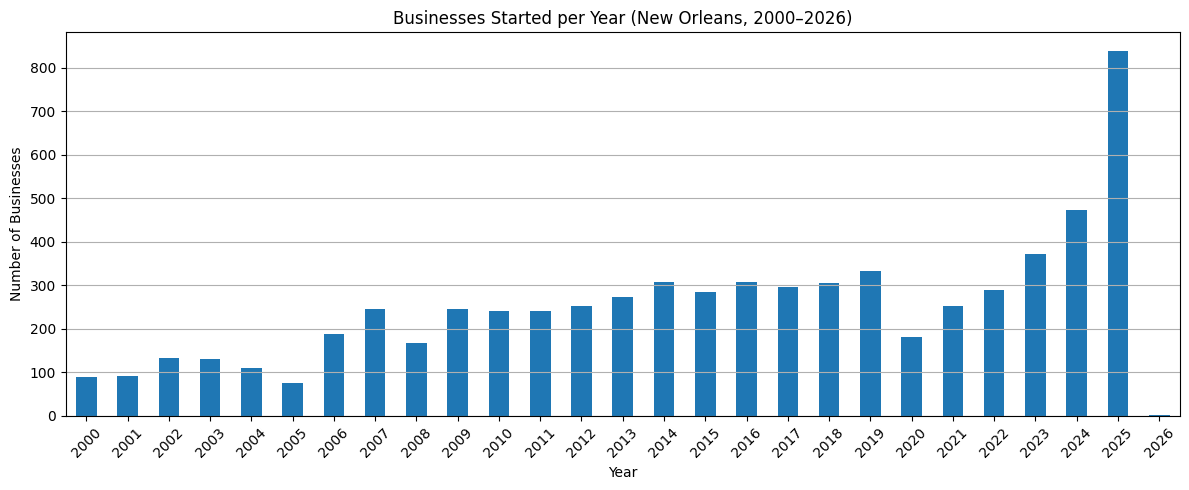

In [11]:
import matplotlib.pyplot as plt

df_filtered = (
    df.loc[
        df['business_start_date'].dt.year.between(2000, 2026)
    ]
    .copy()
)

df_filtered['business_start_year'] = (
    df_filtered['business_start_date'].dt.year.astype(int)
)

year_counts = (
    df_filtered['business_start_year']
    .value_counts()
    .sort_index()
)
start_year = year_counts.index.min()
end_year = year_counts.index.max()

# Plotting

ax = year_counts.plot(
    kind = 'bar',
    figsize = (12, 5),
    title=f'Businesses Started per Year (New Orleans, {start_year}–{end_year})'
)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Businesses')
ax.grid(axis = 'y')

# Fix x-axis labels
ax.set_xticks(range(len(year_counts)))
ax.set_xticklabels(year_counts.index, rotation = 45)

plt.tight_layout()
plt.savefig("businesses_started_yearly.png", dpi = 300, bbox_inches = "tight")
plt.show()

## Business Type Breakdown (Raw Counts)
This output lists every business type found in the dataset and shows how many times each one appears. 

Each line represents a specific type of business license, and the number next to it shows how many businesses of that type exist in the data. The list is automatically sorted from most common at the top to least common at the bottom. 

For example: 
1. Business types like Special Events vendors, Full-Service restaurants, and
   drinking places appear often, which means these types of businesses are
   very common in New Orleans.

2. Near the bottom of the list are business types that show only once, which
   indicates rare or highly specialized business activities.

The final line (Length: 416) tells us there are 416 unique business types in total. This highlights how diverse the local business landscape is, although a smaller number of categories make up the majority of business activity. 

This raw breakdown is useful as a reference view showing the full scope of business types before narrowing the analysis to summaries like the 'Top 5' or 'Top 10 Charts'. 

In [12]:
df.columns
df['businesstype'].value_counts()

businesstype
Special Events-Other (Vendor)                                     857
Full Service Restaurants(table service available)                 776
Drinking Places(Alcoholic Beverages)                              346
Hotels(except Casino Hotels) & Motels                             221
Taxi Service                                                      210
                                                                 ... 
Process, Physical Distribution & Logistics Consulting Services      1
Specialized Freight(except Used) Trucking                           1
Solid Waste Collection                                              1
Drugs and Druggists' Sundries Wholesalers                           1
Navigational Services to Shipping                                   1
Name: count, Length: 416, dtype: int64

## Top 5 Most Business Types (2000-2026)
This chart shows the five types of business openings that appear most often in New Orleans between 2000 and 2026. 

Instead of looking at one specific year, this view combines all business openings across the specified time period and counts how often each business type occurs. 

This helps answer a simple question: 
1. What kinds of businesses are most commonly opened over time?

Each bar represents a business category, and the length of the bar shows how many total businesses of that type were opened during this period. The chart is sorted so the most common business types appear at the top, which makes it easier to compare which industries are more prevalent. 

Overall, this visual highlights the core business sectors that consistently shape the local economy of New Orleans, versus short-term or specific trends. 

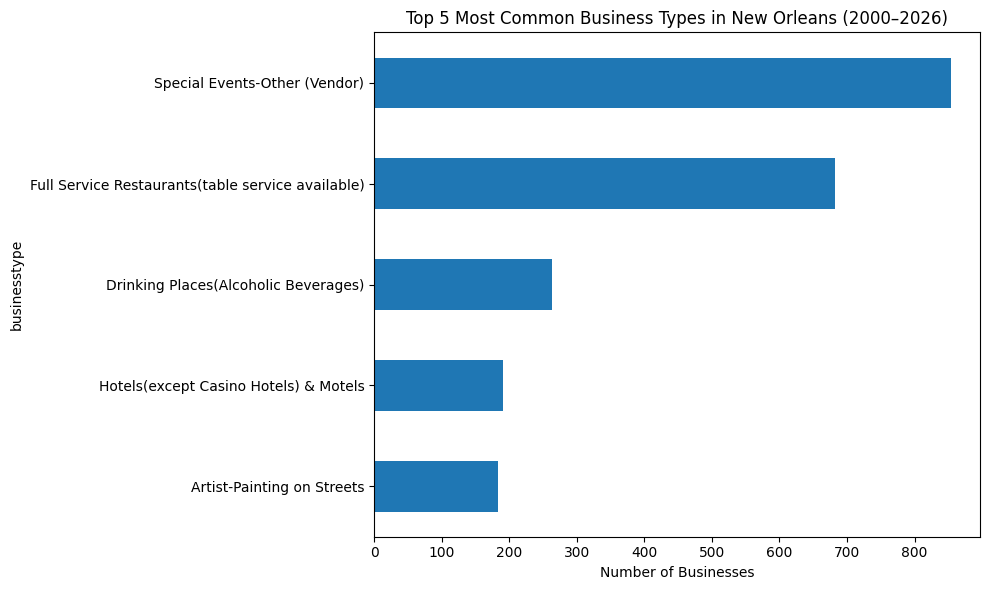

In [13]:
df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors = 'coerce')

df_2000_2026 = df[
    (df['business_start_date'].dt.year >= 2000) &
    (df['business_start_date'].dt.year <= 2026)
].copy()

top_5_types = df_2000_2026['businesstype'].value_counts().head(5)

plt.figure(figsize = (10, 6))
top_5_types.plot(kind = 'barh')
plt.xlabel("Number of Businesses")
plt.title("Top 5 Most Common Business Types in New Orleans (2000–2026)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top5_common_business_types.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [14]:
!pip install folium


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
import folium
test_map = folium.Map(location = [29.95, -90.07], zoom_start = 12)
test_map

In [16]:
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import MiniBatchKMeans
import numpy as np

## Business Density Cluster Map
This interactive map shows where businesses are located across New Orleans. Each dot represents a real business. Nearby businesses are grouped so the map stays easy to read.

To keep the map clear and responsive, this view is limited to 160 businesses. This allows users to explore neighborhoods without the map becoming crowded or overwhelming. You can zoom in, move around the city, and click on a cluster to see more details about the businesses in that area.

In [48]:
import folium
from folium.plugins import MarkerCluster

nola_cluster_map = folium.Map(
    location=[29.95, -90.07],
    zoom_start=11
)

cluster = MarkerCluster().add_to(nola_cluster_map)
for _, row in df_plot.iterrows():
    folium.Marker(
        location = [row["latitude"], row["longitude"]],
        popup = popup_text
    ).add_to(cluster)


nola_cluster_map.save("docs/business_density_map.html")
nola_cluster_map

## Clustered Heatmap Layer of Businesses
This heatmap provides a quick visual overview of where business activity is most concentrated in New Orleans. Warmer colors (green and yellow) indicate areas with a higher concentration of businesses, while cooler colors (blue) represent areas with fewer businesses.

To keep the map easy to read and responsive, this view is limited to 160 businesses. This helps prevent overcrowding on the map while still showing clear patterns of where business activity is strongest across the city.

In [38]:
import folium
from folium.plugins import HeatMap, MarkerCluster

# bounding
lat_min, lat_max = 29.7, 30.2
lon_min, lon_max = -90.3, -89.9

df_nola = map_data[
    map_data["latitude"].between(lat_min, lat_max)
    & map_data["longitude"].between(lon_min, lon_max)
].copy()

df_nola = df_nola.head(160)

# checking limit
df_nola.shape

# Map base
nola_map = folium.Map(
    location = [29.95, -90.07],
    zoom_start = 11,
    tiles = "OpenStreetMap"
)

# Clustering
cluster = MarkerCluster().add_to(nola_map)

for _, row in df_nola.iterrows():
    folium.CircleMarker(
        location = [row["latitude"], row["longitude"]],
        radius = 4,
        fill = True,
        fill_opacity = 0.7,
        weight = 0
    ).add_to(cluster)

# heat overlay
heat_data = df_nola[["latitude", "longitude"]].dropna().values.tolist()

HeatMap(
    heat_data,
    radius = 12,
    blur = 15,
    min_opacity = 0.4,
    max_zoom = 14
).add_to(nola_map)

nola_map

In [43]:
nola_map.save("docs/business_heatmap.html")

## Business Type by ZIP Code - Heatmap Summary
This heatmap shows where businesses are most concentrated across New Orleans by ZIP code. Areas with warmer colors indicate ZIP codes with a higher number of businesses, while cooler colors represent areas with fewer businesses. 

Each ZIP code marker provides a quick summary of what's happening in that area by showing the ZIP code itself, the most common type of business found there, and how many businesses are located in that location. 

This makes it easy to spot which parts of the city have the highest levels of business activity and how different areas compare to one another.

In [26]:
df['zip_clean'] = df['zip'].astype(str).str.extract(r'(\d{5})')

df_valid = df[
    (df['latitude'].between(29.5, 30.2)) &
    (df['longitude'].between(-90.4, -89.6))
].copy()

zip_business_counts = (
    df_valid.groupby(['zip_clean', 'businesstype'])
            .size()
            .reset_index(name = 'count')
)

zip_top_business = zip_business_counts.loc[
    zip_business_counts.groupby('zip_clean')['count'].idxmax()
].reset_index(drop = True)

zip_centroids = (
    df_valid.groupby('zip_clean')[['latitude', 'longitude']]
            .mean()
            .reset_index()
)


# ZIP markers added 
heat_points = df_valid[['latitude', 'longitude']].dropna().values.tolist()
m = folium.Map(location = [29.95, -90.07], zoom_start = 11, tiles = "cartodbpositron")

heat_layer = folium.FeatureGroup(name = "Business Density (Heatmap)", show = True)
HeatMap(heat_points, radius = 18, blur = 22, min_opacity = 0.25).add_to(heat_layer)
heat_layer.add_to(m)

zip_totals = (
    df_valid.groupby("zip_clean")
    .size()
    .reset_index(name = "total_businesses")
)

zip_summary = (
    zip_top_business.merge(zip_totals, on = "zip_clean", how = "left")
)

zip_summary = zip_summary.merge(zip_centroids, on="zip_clean", how="left")
zip_layer = folium.FeatureGroup(name="ZIP Summary (Top Type + Count)", show=True)

for _, r in zip_summary.dropna(subset=["latitude", "longitude"]).iterrows():
    zip_code = r["zip_clean"]
    top_type = r["businesstype"]
    top_type_count = int(r["count"])
    total = int(r["total_businesses"])

    tooltip = f"ZIP {zip_code} | Total: {total} | Top: {top_type} ({top_type_count})"

    folium.CircleMarker(
        location = [r["latitude"], r["longitude"]],
        radius = 6,
        weight = 1,
        fill = True,
        fill_opacity = 0.85,
        tooltip = tooltip
    ).add_to(zip_layer)

zip_layer.add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m


zip_map_data = pd.merge(zip_top_business, zip_centroids, on = 'zip_clean', how = 'inner')
zip_map = folium.Map(
    location = [df_valid['latitude'].mean(), df_valid['longitude'].mean()],
    zoom_start = 11
)

heat_data = [
    [row['latitude'], row['longitude'], row['count']]
    for _, row in zip_map_data.iterrows()
]

HeatMap(heat_data, radius = 28, blur = 22, max_zoom = 13).add_to(zip_map)

for _, row in zip_map_data.iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        radius = 10,
        color = 'black',
        weight = 1,
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.8,
        popup = (
            f"<b>ZIP Code:</b> {row['zip_clean']}<br>"
            f"<b>Top Business Type:</b> {row['businesstype']}<br>"
            f"<b>Count:</b> {row['count']}"
        ),
        tooltip=f"{row['zip_clean']} – {row['businesstype']}"
    ).add_to(zip_map)


zip_map

In [23]:
zip_map.save("zip_map.html")

## Year-Over-Year Business Opening Trends
This section looks at how the number of new business openings in New Orleans changes from one year to the next. It uses business start date records showing general patterns over time rather than focusing on any single year in isolation. 

The data shows relatively little activity in the earlier years, followed by a noticeable drop around 2005. After that point, the number of new businesses increases steadily in the years that follow. 

Looking at the data this way helps illustrate how business openings recovered and grew over time, highlighting longer-term trends rather than short-term ups and downs. 

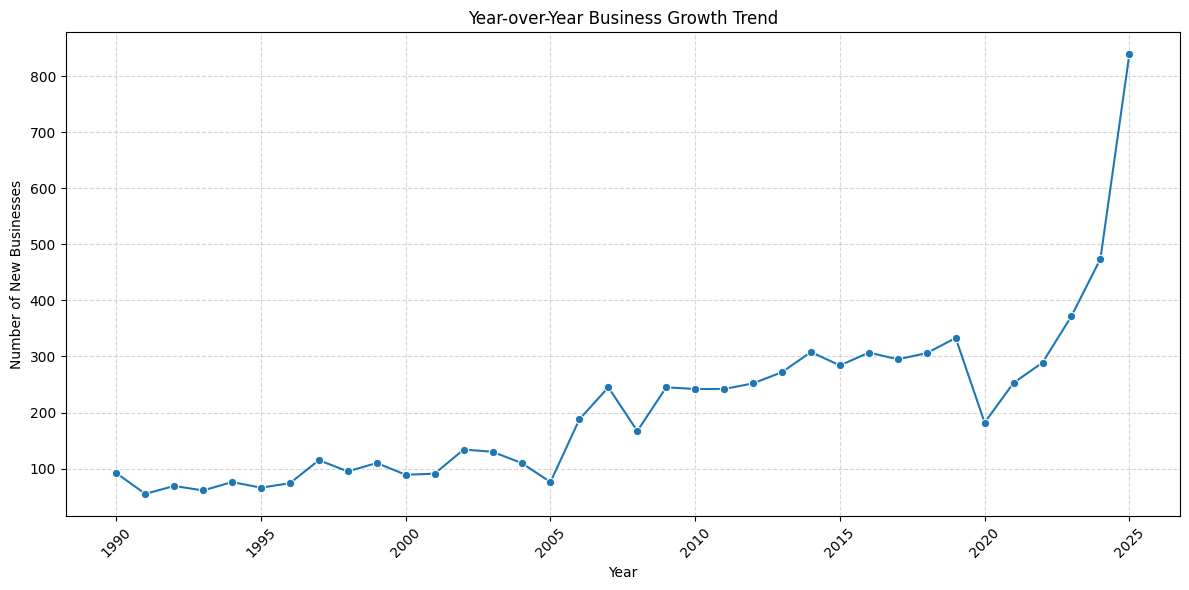

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors='coerce')
df['start_year'] = df['business_start_date'].dt.year

df_clean_years = df[(df['start_year'] >= 1990) & (df['start_year'] <= 2025)]
yoy_growth = df_clean_years.groupby('start_year').size().reset_index(name = 'business_count')


# Trend Chart

plt.figure(figsize = (12,6))
sns.lineplot(data = yoy_growth, x = 'start_year', y = 'business_count', marker = 'o')
plt.title("Year-over-Year Business Growth Trend")
plt.xlabel("Year")
plt.ylabel("Number of New Businesses")
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.savefig("yoy_business_growth_trend.png", dpi = 300, bbox_inches = "tight")
plt.show()

## Q4 Business Openings Over Time (2000-2026)
These two charts work together to explain year-end business activity from 2000 to 2026.

The first chart shows how the number of businesses starting in the last quarter of each year changes over time. This makes it easier to compare one year's Q4 activity to another and identify broader patterns such as growth, slowdowns, or recovery during the year-end period. 

The second chart focuses on the business types that tend to start during the last quarter across the entire time range. Instead of breaking the data out by year, it combines all Q4 records highligting business types that most often contribute to year-end openings. 

Together, both charts answer two questions: 
1. When year-end business activity increases or decreases over time.
2. The types of businesses that are most commonly responsible for that
   activity.

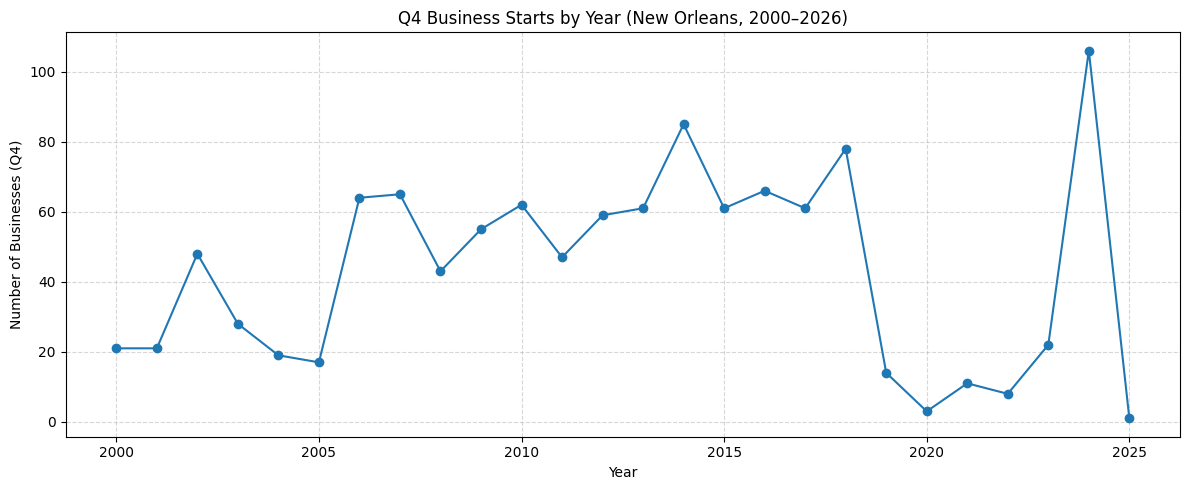

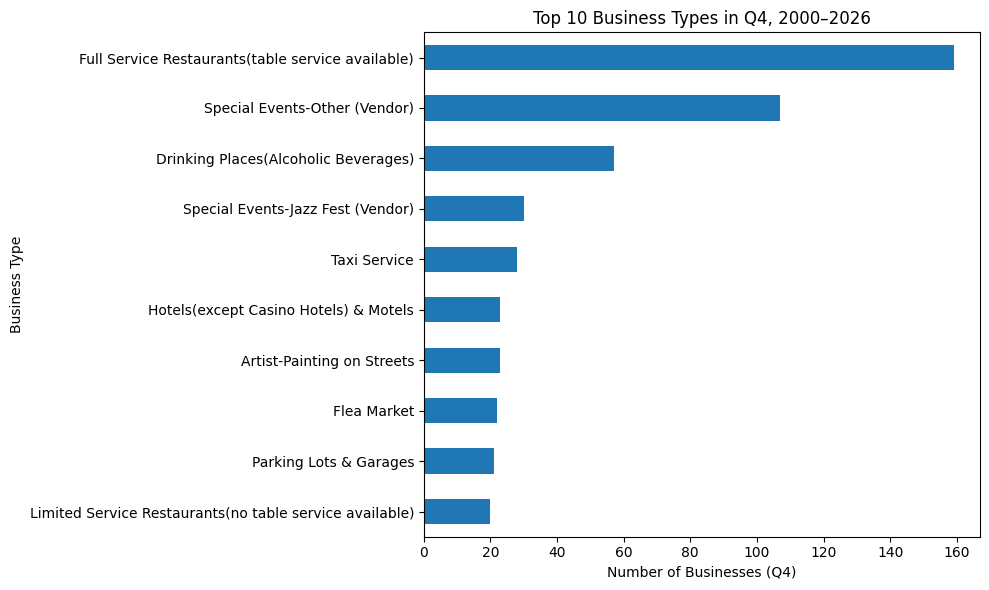

Total Q4 records (2000–2026): 1126


In [25]:
import pandas as pd
import matplotlib.pyplot as plt



df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors = 'coerce')

q4 = df[df['business_start_date'].dt.month.isin([10, 11, 12])].copy()
q4['year'] = q4['business_start_date'].dt.year.astype('Int64')
q4 = q4[q4['year'].between(2000, 2026)].copy()

q4_by_year = q4['year'].value_counts().sort_index()

ax = q4_by_year.plot(kind = 'line', marker = 'o', figsize = (12, 5))
ax.set_title('Q4 Business Starts by Year (New Orleans, 2000–2026)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Businesses (Q4)')
ax.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.savefig('images/q4_business_starts_by_year.png', dpi = 300, bbox_inches = 'tight')
plt.show()

TOP_N = 10
top_types_q4 = q4['businesstype'].value_counts().head(TOP_N).sort_values()

ax = top_types_q4.plot(kind = 'barh', figsize = (10, 6))
ax.set_title(f'Top {TOP_N} Business Types in Q4, 2000–2026')
ax.set_xlabel('Number of Businesses (Q4)')
ax.set_ylabel('Business Type')
plt.tight_layout()
plt.savefig('images/top_10_business_types.png', dpi = 300, bbox_inches = 'tight')
plt.show()

print(f"Total Q4 records (2000–2026): {len(q4)}")